In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 21_11_2022 07_32_59.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 30_05_2022 09_48_25.xlsx')

In [5]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [6]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza',2:'Influenza'})

In [7]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

In [8]:
filtro = dados[['Competencia Internacao','Houve internacao','Classificacao final','Faixa Etaria','Idade','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro['Idade'] = filtro['Idade'].fillna(0)
filtro

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_19064\3845840120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['Idade'] = filtro['Idade'].fillna(0)


,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2021_12,Sim,Não Informado,20-29 anos,22.0,NaN,NaN,NaN,NaN
1,2021_07,Sim,Não Informado,60-69 anos,69.0,NaN,NaN,NaN,NaN
2,NaN,Não Informado,Não Informado,60-69 anos,65.0,NaN,NaN,NaN,NaN
3,2021_02,Sim,COVID-19,50-59 anos,58.0,NaN,NaN,NaN,NaN
4,NaN,Não,COVID-19,80 e mais anos,91.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
184431,2021_02,Sim,COVID-19,80 e mais anos,85.0,Nao,NaN,NaN,NaN
184432,2021_09,Sim,COVID-19,40-49 anos,46.0,NaN,NaN,NaN,NaN
184433,2021_03,Sim,COVID-19,50-59 anos,56.0,NaN,NaN,NaN,NaN
184434,2020_07,Sim,SRAG não especificado,80 e mais anos,85.0,NaN,NaN,NaN,NaN


In [9]:
filtro['Idade'] = filtro['Idade'].astype(int)
filtro.head()

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_19064\307549151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['Idade'] = filtro['Idade'].astype(int)


,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2021_12,Sim,Não Informado,20-29 anos,22,NaN,NaN,NaN,NaN
1,2021_07,Sim,Não Informado,60-69 anos,69,NaN,NaN,NaN,NaN
2,NaN,Não Informado,Não Informado,60-69 anos,65,NaN,NaN,NaN,NaN
3,2021_02,Sim,COVID-19,50-59 anos,58,NaN,NaN,NaN,NaN
4,NaN,Não,COVID-19,80 e mais anos,91,NaN,NaN,NaN,NaN


In [10]:
for index, idade in filtro.iterrows():
    if idade['Idade'] < 12:
        filtro.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtro.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtro.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtro.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtro.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtro.loc[index,'Idade'] = '80 e mais'

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_19064\4269199503.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro.loc[index,'Idade'] = '20-39 anos'


In [11]:
filtro = filtro.loc[filtro['pcr_vsr']==1]
filtro = filtro.loc[filtro['Houve internacao']=='Sim']
filtro

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
439,2021_05,Sim,SRAG por outro vírus resp,0-9 anos,0-11 anos,NaN,NaN,NaN,1.0
1261,2021_08,Sim,SRAG por outro vírus resp,60-69 anos,60-79 anos,NaN,NaN,NaN,1.0
1530,2022_04,Sim,SRAG por outro vírus resp,20-29 anos,20-39 anos,Nao,NaN,NaN,1.0
1537,2021_06,Sim,SRAG por outro vírus resp,40-49 anos,40-59 anos,NaN,NaN,NaN,1.0
1544,2021_05,Sim,SRAG por outro vírus resp,0-9 anos,0-11 anos,Nao,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
183826,2022_08,Sim,COVID-19,0-9 anos,0-11 anos,Nao,NaN,NaN,1.0
184177,2022_07,Sim,COVID-19,0-9 anos,0-11 anos,Nao,NaN,NaN,1.0
184314,2021_10,Sim,SRAG por outro vírus resp,0-9 anos,0-11 anos,Nao,NaN,NaN,1.0
184340,2022_07,Sim,SRAG por outro vírus resp,0-9 anos,0-11 anos,Nao,NaN,NaN,1.0


In [12]:
totalHospitalizacoes = filtro.groupby('Competencia Internacao').count()
totalHospitalizacoes.head()

,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Competencia Internacao,,,,,,,,
2020_03,1,1,1,1,0,0,0,1
2020_04,1,1,1,1,0,0,0,1
2020_05,2,2,2,2,0,0,0,2
2020_07,1,1,1,1,0,0,0,1
2021_01,5,5,5,5,5,0,0,5


In [13]:
separaIdade = filtro.groupby(['Idade','Competencia Internacao']).count()
separaIdade.head()

Houve internacao  Classificacao final  \
Idade     Competencia Internacao                                          
0-11 anos 2020_03                                1                    1   
          2020_04                                1                    1   
          2021_01                                4                    4   
          2021_02                                4                    4   
          2021_03                               37                   37   

                                  Faixa Etaria  pos_pcrflu  tp_flu_pcr  \
Idade     Competencia Internacao                                         
0-11 anos 2020_03                            1           0           0   
          2020_04                            1           0           0   
          2021_01                            4           4           0   
          2021_02                            4           3           0   
          2021_03                           37          36           0   

                                  pcr_fluasu  pcr_vsr  
Idade     Competencia Internacao                       
0-11 anos 2020_03                          0        1  
          2020_04                          0        1  
          2021_01                          0        4  
          2021_02                          0        4  
          2021_03                          0       37

In [14]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Internacao')
idade11['Proporcao'] = idade11['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade11 = idade11.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade11= idade11.fillna(0)
idade11 = idade11.drop('2020_03')
idade11 = idade11['2021_01':]
idade11 = idade11['Proporcao']
idade11.tail(8)

Competencia Internacao
2022_04    81.481481
2022_05    79.432624
2022_06    84.800000
2022_07    91.320755
2022_08    91.129032
2022_09    93.181818
2022_10    85.714286
2022_11    84.615385
Name: Proporcao, dtype: float64

In [15]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Internacao')
idade19['Proporcao'] = idade19['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade19 = idade19.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19= idade19.fillna(0)
idade19 = idade19.drop('2020_03')
idade19 = idade19['2021_01':]
idade19 = idade19['Proporcao']
idade19.tail(8)

Competencia Internacao
2022_04    0.925926
2022_05    0.000000
2022_06    0.000000
2022_07    0.754717
2022_08    0.806452
2022_09    0.000000
2022_10    0.000000
2022_11    0.000000
Name: Proporcao, dtype: float64

In [16]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Internacao')
idade39['Proporcao'] = idade39['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade39 = idade39.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39.drop(['2020_03'])
idade39= idade39.fillna(0)
idade39 = idade39['2021_01':]
idade39 = idade39['Proporcao']
idade39.tail(8)

Competencia Internacao
2022_04    2.777778
2022_05    0.709220
2022_06    0.800000
2022_07    1.132075
2022_08    2.419355
2022_09    0.000000
2022_10    0.000000
2022_11    0.000000
Name: Proporcao, dtype: float64

In [17]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Internacao')
idade59['Proporcao'] = idade59['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade59 = idade59.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(['2020_03'])
idade59= idade59.fillna(0)
idade59 = idade59['2021_01':]
idade59 = idade59['Proporcao']
idade59.tail(8)

Competencia Internacao
2022_04    4.629630
2022_05    3.546099
2022_06    3.600000
2022_07    2.264151
2022_08    0.806452
2022_09    0.000000
2022_10    7.142857
2022_11    0.000000
Name: Proporcao, dtype: float64

In [18]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Internacao')
idade79['Proporcao'] = idade79['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade79 = idade79.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade79= idade79.fillna(0)
idade79 = idade79.drop('2020_03')
idade79 = idade79['2021_01':]
idade79 = idade79['Proporcao']
idade79.head(8)

Competencia Internacao
2021_01    20.000000
2021_02    16.666667
2021_03     2.380952
2021_04     7.142857
2021_05     6.735751
2021_06     4.371585
2021_07    12.631579
2021_08     9.859155
Name: Proporcao, dtype: float64

In [19]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Internacao')
idade80['Proporcao'] = idade80['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade80 = idade80.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade80= idade80.fillna(0)
idade80 = idade80.drop('2020_03')
idade80 = idade80['2021_01':]
idade80 = idade80['Proporcao']
idade80.head(8)

Competencia Internacao
2021_01    0.000000
2021_02    0.000000
2021_03    4.761905
2021_04    3.571429
2021_05    3.108808
2021_06    1.639344
2021_07    4.210526
2021_08    8.450704
Name: Proporcao, dtype: float64

In [20]:
np.size(idade80)

23

In [21]:
competencia = idade80.to_frame()
competencia = competencia.reset_index()
competencia = competencia['Competencia Internacao']
competencia.tail()

18    2022_07
19    2022_08
20    2022_09
21    2022_10
22    2022_11
Name: Competencia Internacao, dtype: object

In [22]:
legenda = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

In [23]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

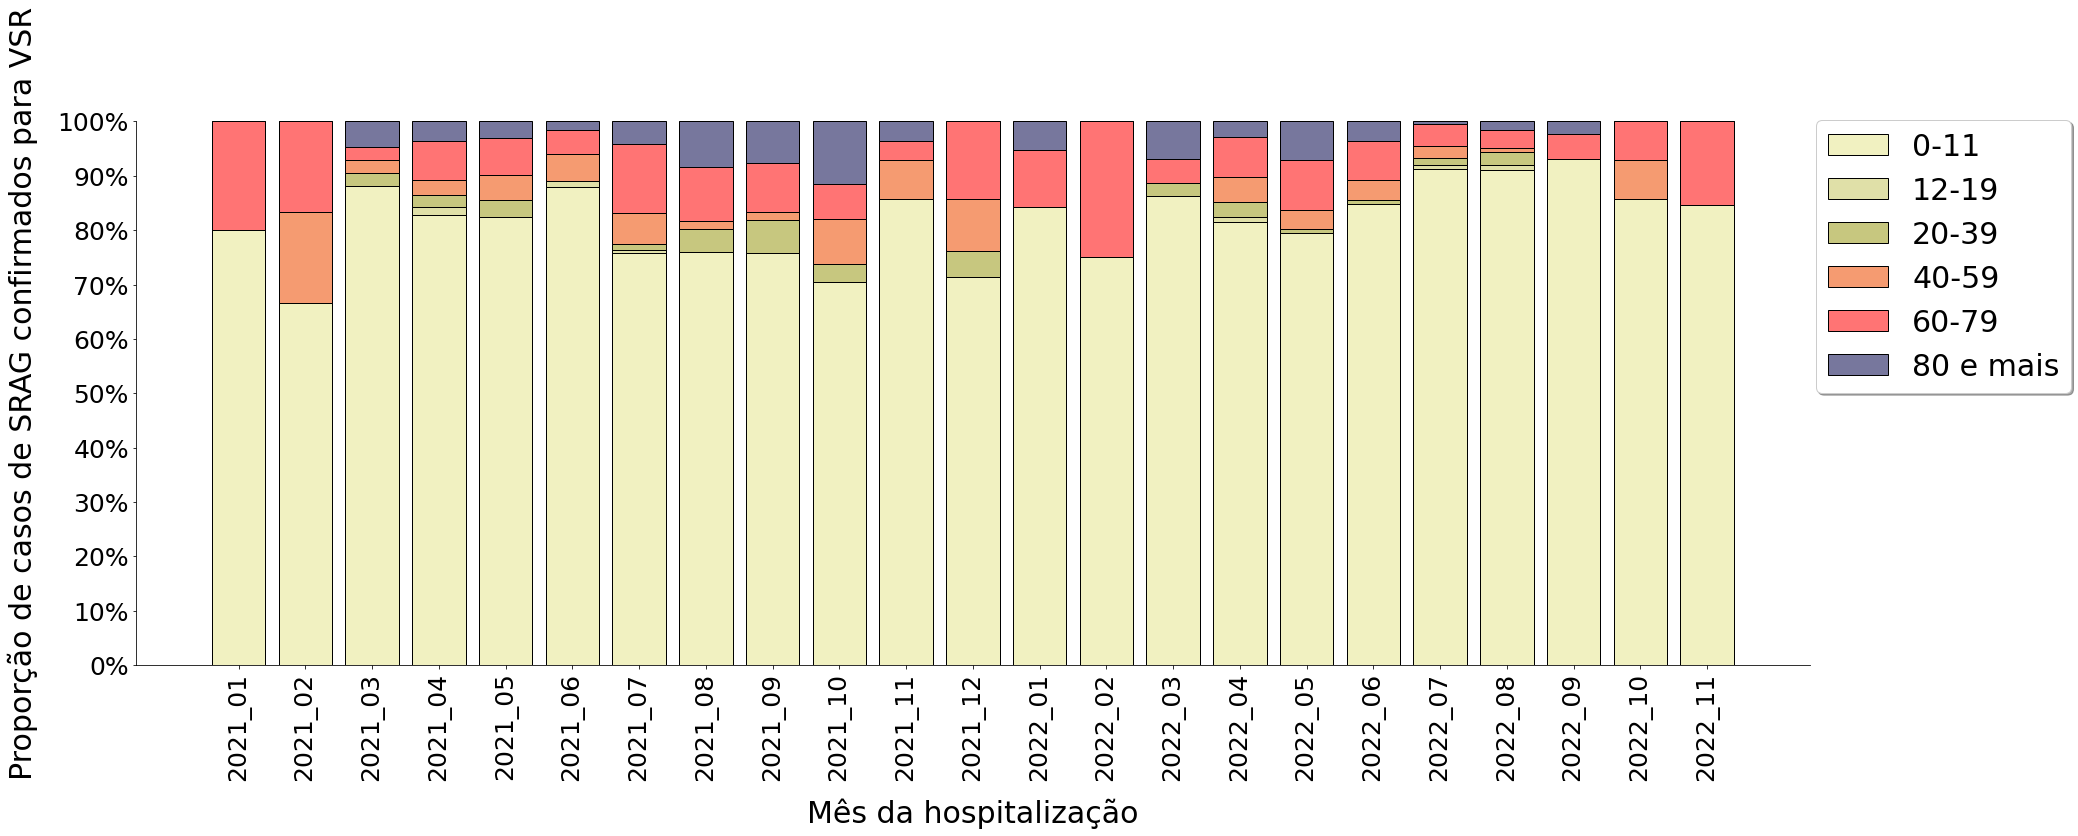

In [24]:
plt.figure(figsize=(30,10))
plt.bar(competencia,idade11, color='#f1f1c1',edgecolor='#000000')
plt.bar(competencia,idade19, bottom=idade11, color="#e0e0a8",edgecolor='#000000')
plt.bar(competencia,idade39, bottom=idade11 + idade19, color='#c7c77f',edgecolor='#000000')
plt.bar(competencia,idade59, bottom=np.array(idade11) + np.array(idade19) + np.array(idade39), color='#f59b71',edgecolor='#000000')
plt.bar(competencia,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#ff7474',edgecolor='#000000')
plt.bar(competencia,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#77779d',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês da hospitalização',fontsize=30,labelpad=18)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de casos de SRAG confirmados para VSR',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/proporcaoHosp_VSR.jpeg',dpi=720,bbox_inches='tight')